In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('air_quality_health_dataset.csv')
df.head()

,date,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,...,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
0,2020-01-01,East,109.934283,31.382887,57.718373,47.654022,25.874070,0.956973,32.574682,37.555663,...,0,43.103376,75.706162,0,66.098466,9757,63.001573,11,1957.637287,42.348419
1,2020-01-02,Central,97.234714,47.094225,67.381383,50.734127,10.605095,0.990203,23.749138,24.900342,...,0,30.606591,69.652802,0,107.686174,9157,6.417798,13,2962.769470,27.712735
2,2020-01-03,East,112.953771,53.795917,61.158796,44.986899,18.361025,1.019288,35.530851,23.437165,...,0,13.037424,82.561183,1,77.445192,2058,66.001849,3,6912.007043,41.031516
3,2020-01-04,West,130.460597,88.315315,69.040084,20.575023,19.791700,1.284058,25.277106,22.388200,...,0,8.974779,73.642836,0,51.864000,8726,79.580923,6,9227.543628,40.543537
4,2020-01-05,South,95.316933,68.348297,75.716994,38.445776,20.079543,0.775835,35.996440,26.881835,...,1,96.022689,68.688106,0,148.714488,9720,6.301105,8,1277.810175,5.648920


In [ ]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3000 non-null   object 
 1   region                  3000 non-null   object 
 2   AQI                     3000 non-null   float64
 3   PM2.5                   3000 non-null   float64
 4   PM10                    3000 non-null   float64
 5   NO2                     3000 non-null   float64
 6   SO2                     3000 non-null   float64
 7   CO                      3000 non-null   float64
 8   O3                      3000 non-null   float64
 9   temperature             3000 non-null   float64
 10  humidity                3000 non-null   float64
 11  wind_speed              3000 non-null   float64
 12  precipitation           3000 non-null   float64
 13  hospital_visits         3000 non-null   int64  
 14  emergency_visits        3000 non-null   

In [ ]:
df.columns

Index(['date', 'region', 'AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'temperature', 'humidity', 'wind_speed', 'precipitation',
       'hospital_visits', 'emergency_visits', 'mobility_index',
       'school_closures', 'public_transport_usage', 'mask_usage_rate',
       'lockdown_status', 'industrial_activity', 'vehicle_count',
       'construction_activity', 'respiratory_admissions', 'population_density',
       'green_cover_percentage'],
      dtype='object')

utile per la classificazione

In [ ]:
geographic_area = df.groupby('region')

size_of_regions = geographic_area.size()

size_of_regions_sorted = size_of_regions.sort_values(ascending=False)

print(size_of_regions_sorted)


region
East       635
South      619
North      586
West       583
Central    577
dtype: int64


temperatura media per regione

In [ ]:
temperatura_media_per_regione = df.groupby('region')['temperature'].mean()
print(temperatura_media_per_regione)


region
Central    25.199887
East       24.953171
North      24.944859
South      24.740924
West       24.927817
Name: temperature, dtype: float64


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Crea una nuova colonna per l'anno
df['anno'] = df['date'].dt.year

# Crea una nuova colonna per il mese
df['mese'] = df['date'].dt.month

In [ ]:
regione_specifica='Central'
df_regione = df[df['region'] == regione_specifica]
media_annuale_mensile_regionale = df_regione.groupby(['anno', 'region', 'mese'])['temperature'].mean()

print(media_annuale_mensile_regionale)

anno  region   mese
2020  Central  1       25.765082
               2       25.238057
               3       25.220835
               4       24.771843
               5       25.827574
               6       24.040012
               7       25.085247
               8       26.233575
               9       26.931812
               10      25.457427
               11      26.058766
               12      24.490168
2021  Central  1       23.904546
               2       28.127760
               3       26.780495
               4       23.181906
               5       25.773069
               6       25.043469
               7       22.719550
               8       24.082452
               9       24.441449
               10      23.934545
               11      25.413151
               12      25.731477
Name: temperature, dtype: float64


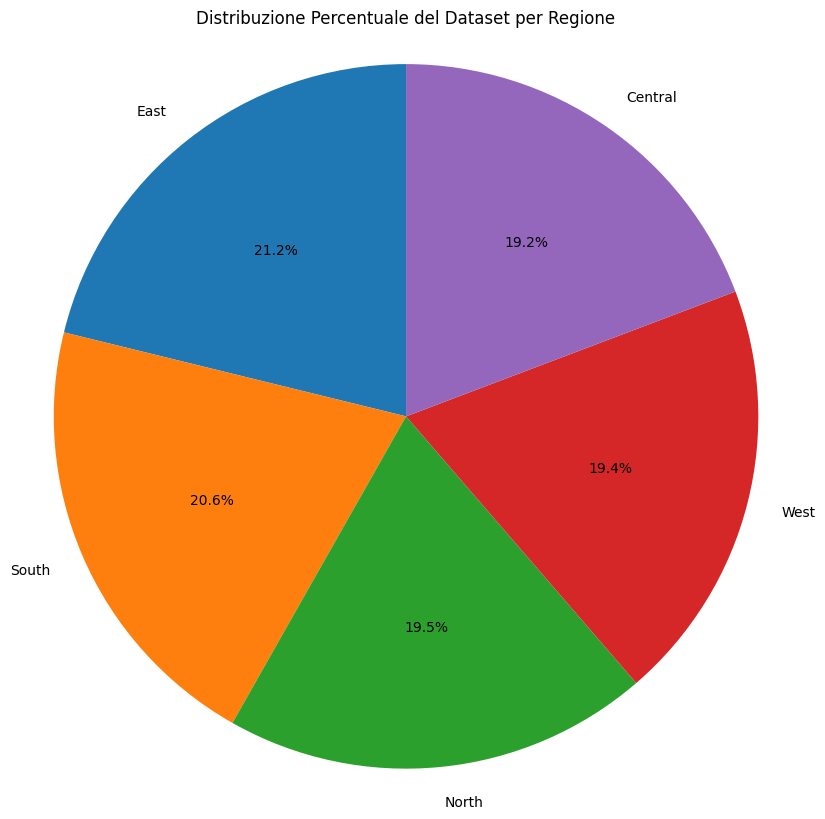

In [ ]:
sizes = size_of_regions_sorted.values  # I valori (conteggi)
labels = size_of_regions_sorted.index.tolist()  # Le etichette (nomi delle regioni)
plt.figure(figsize=(10, 10))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',   # Formatta le percentuali
    startangle=90        # Inizia il grafico dall'alto
)
plt.title('Distribuzione Percentuale del Dataset per Regione')
plt.axis('equal') # Garantisce che il grafico sia un cerchio
plt.show()

andamento temperatura per regione, qualita aria e concetrazione di co

In [ ]:
df.isnull().any()


date                      False
region                    False
AQI                       False
PM2.5                     False
PM10                      False
NO2                       False
SO2                       False
CO                        False
O3                        False
temperature               False
humidity                  False
wind_speed                False
precipitation             False
hospital_visits           False
emergency_visits          False
mobility_index            False
school_closures           False
public_transport_usage    False
mask_usage_rate           False
lockdown_status           False
industrial_activity       False
vehicle_count             False
construction_activity     False
respiratory_admissions    False
population_density        False
green_cover_percentage    False
anno                      False
mese                      False
dtype: bool